In [2]:
import numpy as np          # Performs mathematical operations over array
import pandas as pd         # Library used for working with dataframes I/O file (eg. csv file)
import matplotlib.pyplot as plt        # Visualization tool in python
import seaborn as sns                  # Statistical graph in python

In [3]:
#Reading CSV file
data = pd.read_csv('Dataset.csv', encoding='latin-1')
data.shape            # Displays rows and columns of a dataframe

(1303, 13)

In [4]:
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [5]:
#checking data type for each feature & correct datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


* All the features have correct datatypes

In [6]:
#Renaming column names 
data.columns = ['Laptop_ID','Company','Product','Model','Inches','Resolution','CPU','RAM','Memory','GPU','OS','Weight','Price_Euros']

In [7]:
data.nunique()      # finding number of unique values in each feature

Laptop_ID      1303
Company          19
Product         618
Model             6
Inches           18
Resolution       40
CPU             118
RAM               9
Memory           39
GPU             110
OS                9
Weight          179
Price_Euros     791
dtype: int64

In [8]:
data['Company'].unique()          #unvique labels in feature 'Company'

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [9]:
#checking missing values, unique values and data type for each variable by creating user defined function

def df_summary1(df):
    df_U = df.nunique()
    df_M = df.isnull().sum()
    df_I = df.dtypes
    
    ## converting all data to dataframe
    df_U = df_U.to_frame()                  # assigns index to dataframe
    df_M = df_M.to_frame()
    df_I = df_I.to_frame()
    
    ## renaming columns to default 0 to some sensible name
    df_U = df_U.rename(columns= {0: 'Unique Data'})                   # Renaming the column to 'Unique Data'
    df_M = df_M.rename(columns= {0: 'Missing Data'})                  # Renaming the column to 'Missing Data'
    df_I = df_I.rename(columns= {0: 'Data Types'})                    # Renaming the column to 'Data Types'
    
    ## concatting the 3 dataframes. Remember pd.merge can merge only 2 df at a time
    output1 = pd.concat([df_U,df_M,df_I], axis = 1)                    # merges two dataframes with another dataframe w.r.t 'index'
    return output1

In [10]:
df_summary1(data)                    # calling the above created user defined function

,Unique Data,Missing Data,Data Types
Laptop_ID,1303,0,int64
Company,19,0,object
Product,618,0,object
Model,6,0,object
Inches,18,0,float64
Resolution,40,0,object
CPU,118,0,object
RAM,9,0,object
Memory,39,0,object
GPU,110,0,object


In [11]:
data1 = data.copy()    # making the copy of original data

In [12]:
#checking duplicate values
data1.duplicated().sum()

0

* No duplicate rows present.

In [13]:
# Dropping the columns not necessary for analysis
data1 = data1.drop(columns = ['Product','Laptop_ID'], axis=1)

In [14]:
# columns remaining after dropping some features
data1.columns

Index(['Company', 'Model', 'Inches', 'Resolution', 'CPU', 'RAM', 'Memory',
       'GPU', 'OS', 'Weight', 'Price_Euros'],
      dtype='object')

# Feature Engineering

* Model, Inches, Weight, Resolution, CPU, RAM, Memory, GPU, OS -> to do feature engineering

* No correlation b/w Company, RAM, CPU, Weight, Model, Product

In [15]:
# One Hot Encoding for features 'Model' and 'OS'
data1 = pd.get_dummies(data = data1, columns = ['Model', 'OS'])
data1.columns              # Displays the names of columns in the dataframe

Index(['Company', 'Inches', 'Resolution', 'CPU', 'RAM', 'Memory', 'GPU',
       'Weight', 'Price_Euros', 'Model_2 in 1 Convertible', 'Model_Gaming',
       'Model_Netbook', 'Model_Notebook', 'Model_Ultrabook',
       'Model_Workstation', 'OS_Android', 'OS_Chrome OS', 'OS_Linux',
       'OS_Mac OS X', 'OS_No OS', 'OS_Windows 10', 'OS_Windows 10 S',
       'OS_Windows 7', 'OS_macOS'],
      dtype='object')

In [16]:
# Converting Object type of features 'RAM' and 'Weight' into float64 type 

# Replaces the 'GB' with '' and converting data into float
data1['RAM'] = data1['RAM'].str.replace('GB','').astype(float)

# Replaces the 'kg' with '' and converting data into float
data1['Weight'] = data1['Weight'].str.replace('kg','').astype(float)

In [17]:
data1.info()               # Displays the datatypes and null values of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Company                   1303 non-null   object 
 1   Inches                    1303 non-null   float64
 2   Resolution                1303 non-null   object 
 3   CPU                       1303 non-null   object 
 4   RAM                       1303 non-null   float64
 5   Memory                    1303 non-null   object 
 6   GPU                       1303 non-null   object 
 7   Weight                    1303 non-null   float64
 8   Price_Euros               1303 non-null   float64
 9   Model_2 in 1 Convertible  1303 non-null   uint8  
 10  Model_Gaming              1303 non-null   uint8  
 11  Model_Netbook             1303 non-null   uint8  
 12  Model_Notebook            1303 non-null   uint8  
 13  Model_Ultrabook           1303 non-null   uint8  
 14  Model_Wo

In [18]:
# seperating the x_resolution & y_resolution
# Splits the data based on 'x' symbol , converts into 'True' when expand = True
res = data1['Resolution'].str.split('x', expand =True)
res

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [19]:
# Assigning values for x_resolution & y_resolution
data1['x_res'] = res[0]                      # Assigning column '0' to 'x res'
data1['y_res'] = res[1].astype(int)          # Assigning column '1' to 'y res'

In [20]:
# creating user defined function for finding digits from text data
def find_digit(text):

  num = pd.Series([int(i) for i in text.split() if i.isdigit()])     # splitting the data based on space, checks if digit is present in text.
  return num                                                         # returns number


In [21]:
#extracting digits from the dataframe from dataframe using 'apply' method. Within apply method creating lambda function 
# Calling the user defined function inside lambda function
data1['x_res'] = data1['x_res'].apply(lambda x: find_digit(x))

PPI - https://www.calculatorsoup.com/calculators/technology/ppi-calculator.php

In [22]:
# PPI calculation by applying formula on 'x_res' and 'y_res'
data1["PPI"]=(((data1["x_res"]**2+data1["y_res"]**2)**(1/2))/data1["Inches"]) 
data1["PPI"]

0       226.983005
1       127.677940
2       141.211998
3       220.534624
4       226.983005
           ...    
1298    157.350512
1299    276.053530
1300    111.935204
1301    100.454670
1302    100.454670
Name: PPI, Length: 1303, dtype: float64

In [23]:
# calculating screen resolution using 'x_res' and 'y_res'
data1["ScreenResolution"]=(data1["x_res"]*data1["y_res"])
data1["ScreenResolution"]

0       4096000
1       1296000
2       2073600
3       5184000
4       4096000
         ...   
1298    2073600
1299    5760000
1300    1049088
1301    1049088
1302    1049088
Name: ScreenResolution, Length: 1303, dtype: int64

In [24]:
#Extracting GPU Brand, split function applied based on space and extracting first indexed value from obtained list.
data1['GPU_brand'] = data1['GPU'].apply(lambda x:x.split()[0])

In [25]:
# Dropping features not required for modeling
data1.drop(["x_res","y_res","Resolution","GPU"],axis = 1,inplace = True)

In [26]:
data1.columns

Index(['Company', 'Inches', 'CPU', 'RAM', 'Memory', 'Weight', 'Price_Euros',
       'Model_2 in 1 Convertible', 'Model_Gaming', 'Model_Netbook',
       'Model_Notebook', 'Model_Ultrabook', 'Model_Workstation', 'OS_Android',
       'OS_Chrome OS', 'OS_Linux', 'OS_Mac OS X', 'OS_No OS', 'OS_Windows 10',
       'OS_Windows 10 S', 'OS_Windows 7', 'OS_macOS', 'PPI',
       'ScreenResolution', 'GPU_brand'],
      dtype='object')

In [27]:
# Splitting the text based on space and again joined with space and extracting first three texts.
data1['CPU Name'] = data1['CPU'].apply(lambda x:" ".join(x.split()[0:3]))

In [28]:
#creating function to extract CPU Name
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':    #if text is matching then return the text
        return text
    else:
        if text.split()[0] == 'Intel':                                   #    else return the 'Intel' or 'AMD Processor'
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [29]:
data1["CPU"].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: CPU, Length: 118, dtype: int64

In [30]:
# calling the user defined function on the feature 'CPU Name'
data1["CPU Brand"] = data1["CPU Name"].apply(fetch_processor)

In [31]:
data1.head()

,Company,Inches,CPU,RAM,Memory,Weight,Price_Euros,Model_2 in 1 Convertible,Model_Gaming,Model_Netbook,...,OS_No OS,OS_Windows 10,OS_Windows 10 S,OS_Windows 7,OS_macOS,PPI,ScreenResolution,GPU_brand,CPU Name,CPU Brand
0,Apple,13.3,Intel Core i5 2.3GHz,8.0,128GB SSD,1.37,1339.69,0,0,0,...,0,0,0,0,1,226.983005,4096000,Intel,Intel Core i5,Intel Core i5
1,Apple,13.3,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,1.34,898.94,0,0,0,...,0,0,0,0,1,127.677940,1296000,Intel,Intel Core i5,Intel Core i5
2,HP,15.6,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,1.86,575.00,0,0,0,...,1,0,0,0,0,141.211998,2073600,Intel,Intel Core i5,Intel Core i5
3,Apple,15.4,Intel Core i7 2.7GHz,16.0,512GB SSD,1.83,2537.45,0,0,0,...,0,0,0,0,1,220.534624,5184000,AMD,Intel Core i7,Intel Core i7
4,Apple,13.3,Intel Core i5 3.1GHz,8.0,256GB SSD,1.37,1803.60,0,0,0,...,0,0,0,0,1,226.983005,4096000,Intel,Intel Core i5,Intel Core i5


In [32]:
data1["CPU Brand"].value_counts()

Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             63
Name: CPU Brand, dtype: int64

In [33]:
# Formatting Memory feature
data1['Memory'] = data1['Memory'].astype(str).replace('\.0', '', regex=True)   # Replace the '.0' from text with ''
data1["Memory"].value_counts()                                                 # Counts the unique labels present in that feature

256GB SSD                        412
1TB HDD                          224
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1TB Hybrid                         9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [34]:
# Calculating total memory value
data1["Memory"] = data1["Memory"].str.replace('GB', '')           # Replaces the 'GB' in text with ''
data1["Memory"] = data1["Memory"].str.replace('TB', '000')        # Replaces the 'TB' in text with '000'
data1["Memory"]

0                 128 SSD
1       128 Flash Storage
2                 256 SSD
3                 512 SSD
4                 256 SSD
              ...        
1298              128 SSD
1299              512 SSD
1300     64 Flash Storage
1301             1000 HDD
1302              500 HDD
Name: Memory, Length: 1303, dtype: object

In [35]:
new = data1["Memory"].str.split("+",expand = True)     # Splitting the text based on '+' and converting into dataframe into different columns.
new.iloc[30]

0    64 Flash Storage
1                None
Name: 30, dtype: object

In [36]:
data1["first"]= new[0]                    # assigning the first coloumn of 'new' dataframe to first
data1["first"]=data1["first"].str.strip()  # Stripping the text's first and last space

data1["second"]= new[1]                  # assigning the second coloumn of 'new' dataframe to second

In [37]:
# segregating into the features HDD, SSD, Hybrid, Flash_Storage from first part of the column. Assigning 1 if its present else 0.
data1["Layer1HDD"] = data1["first"].apply(lambda x: 1 if "HDD" in x else 0)
data1["Layer1SSD"] = data1["first"].apply(lambda x: 1 if "SSD" in x else 0)
data1["Layer1Hybrid"] = data1["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
data1["Layer1Flash_Storage"] = data1["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [38]:
data1['first'] = data1['first'].str.replace(r'\D', '')   #\D matches any character that's not a digit (equivalent to [^0-9])
data1['first']                                          # replaces the character with '' in a feature of dataframe.

/var/folders/04/t60y74qx7210dspdklnp7gn80000gn/T/ipykernel_4897/3626658265.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data1['first'] = data1['first'].str.replace(r'\D', '')   #\D matches any character that's not a digit (equivalent to [^0-9])


0        128
1        128
2        256
3        512
4        256
        ... 
1298     128
1299     512
1300      64
1301    1000
1302     500
Name: first, Length: 1303, dtype: object

In [39]:
data1["second"].isnull().sum()

1095

In [40]:

data1["second"].fillna("0", inplace = True)

In [41]:
# segregating into the features HDD, SSD, Hybrid, Flash_Storage from second part of the column. Assigning 1 if its present else 0.
data1["Layer2HDD"] = data1["second"].apply(lambda x: 1 if "HDD" in x else 0)
data1["Layer2SSD"] = data1["second"].apply(lambda x: 1 if "SSD" in x else 0)
data1["Layer2Hybrid"] = data1["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
data1["Layer2Flash_Storage"] = data1["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

data1['second'] = data1['second'].str.replace(r'\D', '')


/var/folders/04/t60y74qx7210dspdklnp7gn80000gn/T/ipykernel_4897/3601387903.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  data1['second'] = data1['second'].str.replace(r'\D', '')


In [42]:
data1.iloc[:,-10:]            # All rows and columns from last 10 columns to last column

,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
0,128,0,0,1,0,0,0,0,0,0
1,128,0,0,0,0,1,0,0,0,0
2,256,0,0,1,0,0,0,0,0,0
3,512,0,0,1,0,0,0,0,0,0
4,256,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1298,128,0,0,1,0,0,0,0,0,0
1299,512,0,0,1,0,0,0,0,0,0
1300,64,0,0,0,0,1,0,0,0,0
1301,1000,0,1,0,0,0,0,0,0,0


In [43]:
data1["first"] = data1["first"].astype(int)                         # converting datatype into 'int'
data1["second"] = data1["second"].astype(int)                     # converting datatype into 'int'

data1["HDD"]=(data1["first"]*data1["Layer1HDD"]+data1["second"]*data1["Layer2HDD"])   # Calculating total 'HDD' value if present
data1["SSD"]=(data1["first"]*data1["Layer1SSD"]+data1["second"]*data1["Layer2SSD"])   # Calculating total 'SSD' value if present
data1["Hybrid"]=(data1["first"]*data1["Layer1Hybrid"]+data1["second"]*data1["Layer2Hybrid"])   # Calculating total 'Hybrid' value if present
# Calculating total 'Flash_Storage' value if present
data1["Flash_Storage"]=(data1["first"]*data1["Layer1Flash_Storage"]+data1["second"]*data1["Layer2Flash_Storage"])

# dropping columns not required for modelling
data1.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [44]:
data1.sample(2)

,Company,Inches,CPU,RAM,Memory,Weight,Price_Euros,Model_2 in 1 Convertible,Model_Gaming,Model_Netbook,...,OS_macOS,PPI,ScreenResolution,GPU_brand,CPU Name,CPU Brand,HDD,SSD,Hybrid,Flash_Storage
1285,Lenovo,13.3,Intel Core i7 6500U 2.5GHz,16.0,512 SSD,1.3,1499.0,1,0,0,...,0,276.053530,5760000,Intel,Intel Core i7,Intel Core i7,0,512,0,0
133,Acer,15.6,Intel Core i3 7130U 2.7GHz,4.0,256 SSD,2.2,572.0,0,0,0,...,0,141.211998,2073600,Nvidia,Intel Core i3,Intel Core i3,0,256,0,0


In [45]:
#dropping features not required 
data1.drop(["CPU","CPU Name","Memory"],inplace = True,axis=1)
data1.columns

Index(['Company', 'Inches', 'RAM', 'Weight', 'Price_Euros',
       'Model_2 in 1 Convertible', 'Model_Gaming', 'Model_Netbook',
       'Model_Notebook', 'Model_Ultrabook', 'Model_Workstation', 'OS_Android',
       'OS_Chrome OS', 'OS_Linux', 'OS_Mac OS X', 'OS_No OS', 'OS_Windows 10',
       'OS_Windows 10 S', 'OS_Windows 7', 'OS_macOS', 'PPI',
       'ScreenResolution', 'GPU_brand', 'CPU Brand', 'HDD', 'SSD', 'Hybrid',
       'Flash_Storage'],
      dtype='object')

### Checking for Outliers using Boxplot

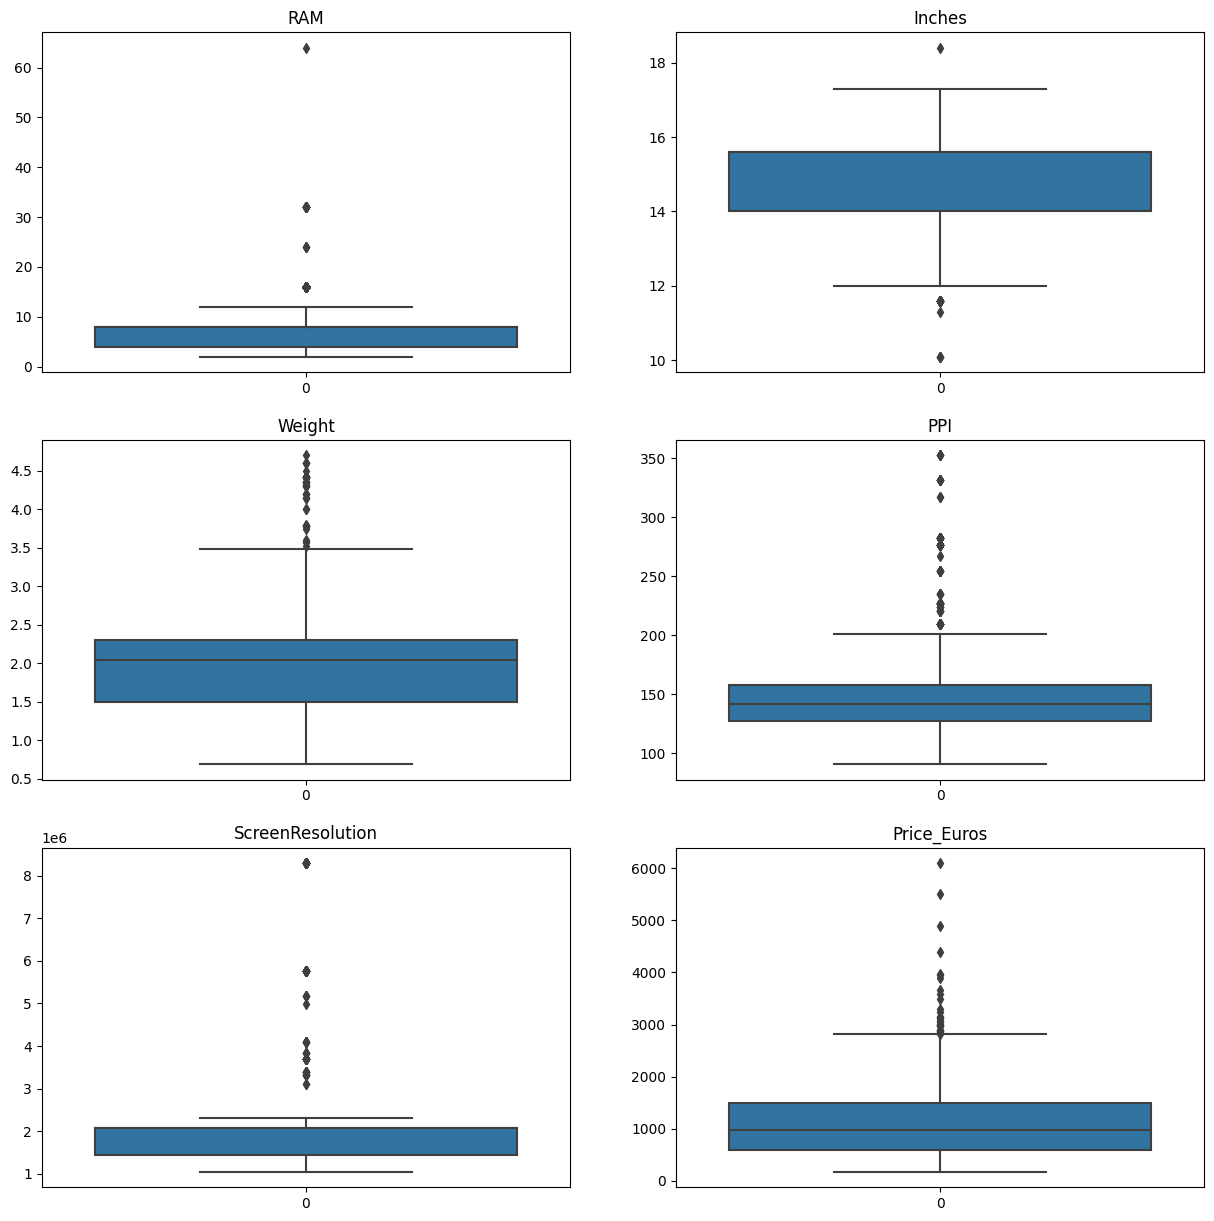

In [46]:
plt.figure(figsize = (15,15))         # sets the figure size by passing length and breadth

plt.subplot(3,2,1)                  # Setting subplot with 3 rows and 2 columns and passing the position as 1 
sns.boxplot(data = data1["RAM"])    # using boxplot, finding data distribution of featue 'RAM'
plt.title('RAM')                    # giving plot a title

plt.subplot(3,2,2)                  # Setting subplot with 3 rows and 2 columns and passing the position as 2
sns.boxplot(data = data1["Inches"])  # using boxplot, finding data distribution of featue 'Inches'
plt.title('Inches')


plt.subplot(3,2,3)                  # Setting subplot with 3 rows and 2 columns and passing the position as 3
sns.boxplot(data = data1["Weight"])  # using boxplot, finding data distribution of featue 'Weight'
plt.title('Weight')

plt.subplot(3,2,4)                  # Setting subplot with 3 rows and 2 columns and passing the position as 4 
sns.boxplot(data = data1["PPI"])    # using boxplot, finding data distribution of featue 'PPI'
plt.title('PPI')

plt.subplot(3,2,5)                  # Setting subplot with 3 rows and 2 columns and passing the position as 5
sns.boxplot(data = data1["ScreenResolution"])     # using boxplot, finding data distribution of featue 'ScreenResolution' 
plt.title('ScreenResolution')

plt.subplot(3,2,6)                   # Setting subplot with 3 rows and 2 columns and passing the position as 6
sns.boxplot(data = data1["Price_Euros"])     # using boxplot, finding data distribution of featue 'Price_Euros'
plt.title('Price_Euros')
plt.show()

# EDA

## Univariate Distribution

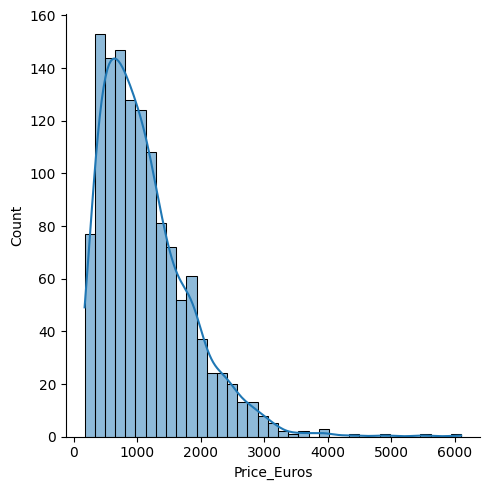

In [47]:
sns.displot(data1['Price_Euros'],kde = True)      # plotting histogram with kde to observe distribution

* The Above graph shows that 'Price_Euros' is 'positive skewed' and the maximum number of the laptops are priced between 200 to 400 Euros.

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64


Text(0, 0.5, 'Number of laptops')

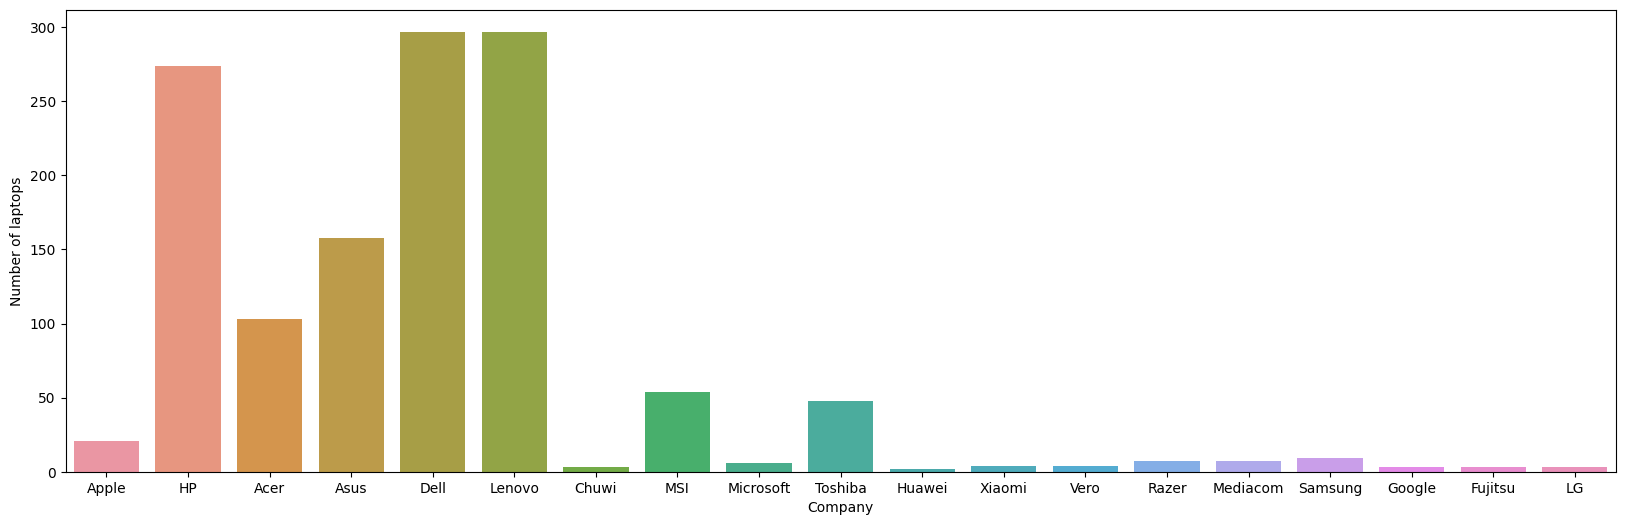

In [48]:
print((data['Company'].value_counts()).sort_values(ascending = False)) # In descending order finding unique values that are counted.
plt.figure(figsize=(20,6))                                               # Setting figure size of the plot
sns.countplot(x="Company", data=data)                                  # Plot graph to find count of each labels in Company 
plt.xlabel('Company')                                                  # setting label of x axis as 'Company'
plt.ylabel('Number of laptops')                                        # setting label of y axis as 'Number of laptops'

* From company 'Dell' and 'Lenovo' , the number of products are high.
* From company 'Huawei' the number of products is the least.

8.0     619
4.0     375
16.0    200
6.0      41
12.0     25
2.0      22
32.0     17
24.0      3
64.0      1
Name: RAM, dtype: int64


Text(0, 0.5, 'Number of laptops')

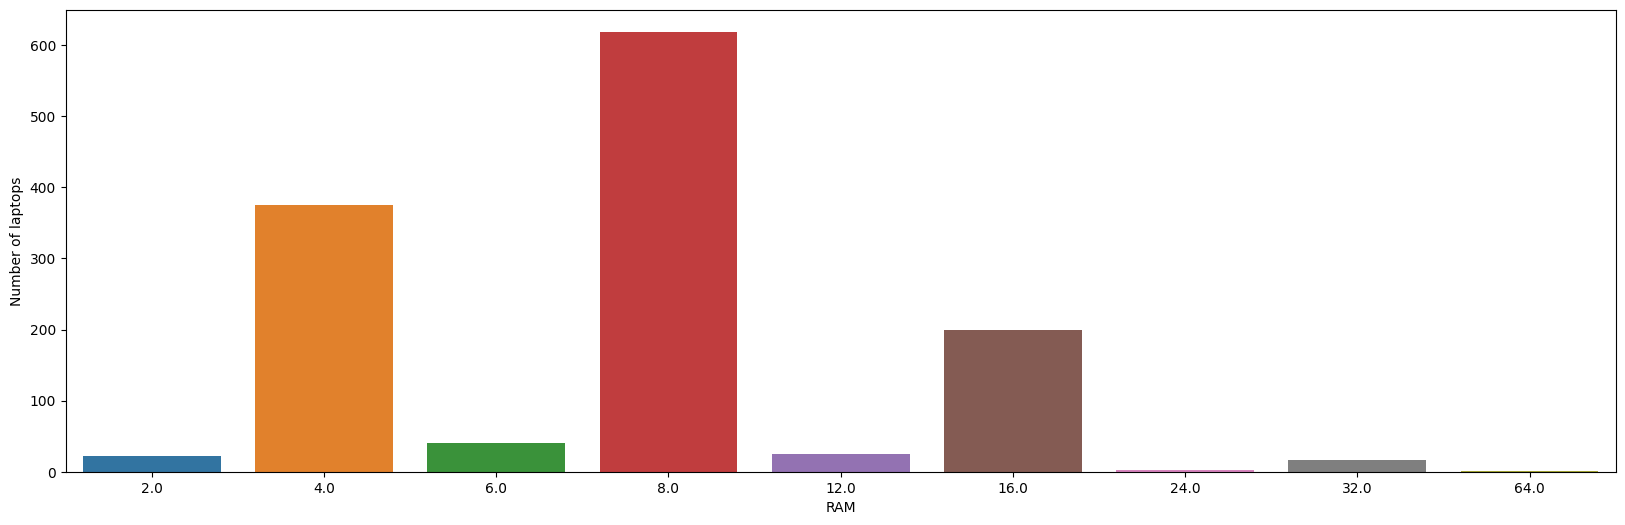

In [49]:
print(data1['RAM'].value_counts())       # In descending order finding unique values that are counted.
plt.figure(figsize=(20,6))                 # Setting figure size of the plot
sns.countplot(x="RAM", data=data1)       # Plot graph to find count of each labels in RAM
plt.xlabel('RAM')                        # setting label of x axis
plt.ylabel('Number of laptops')          # setting label of y axis

* Number of laptops is the most in case of '8 GB RAM and least in case of '64 GB RAM' .

Text(0, 0.5, 'Number of laptops')

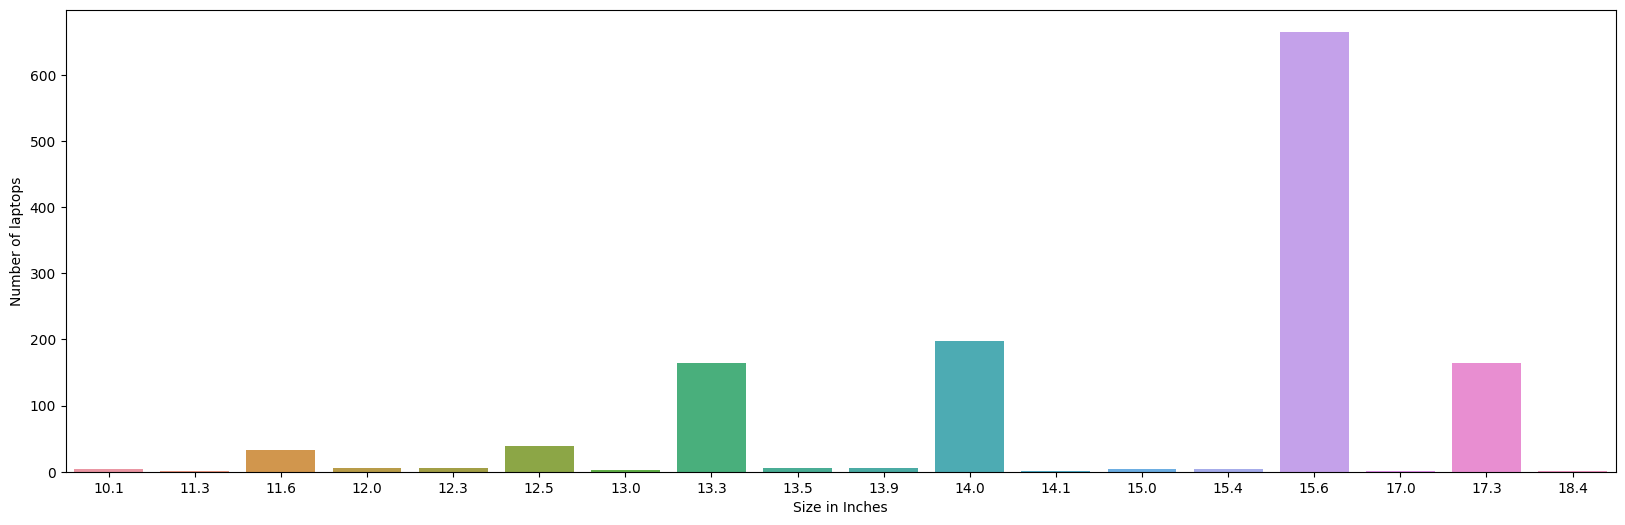

In [50]:
fig, ax = plt.subplots(figsize=(20,6))                      # Setting figure size of the plot
graph = sns.countplot(x="Inches", data=data1, ax=ax)      # Plot graph to find count of each labels in Inches 
plt.xlabel('Size in Inches')                              # setting label of x axis
plt.ylabel('Number of laptops')                           # setting label of y axis

*  The number of laptops is the most in case of '15.6 Inches'

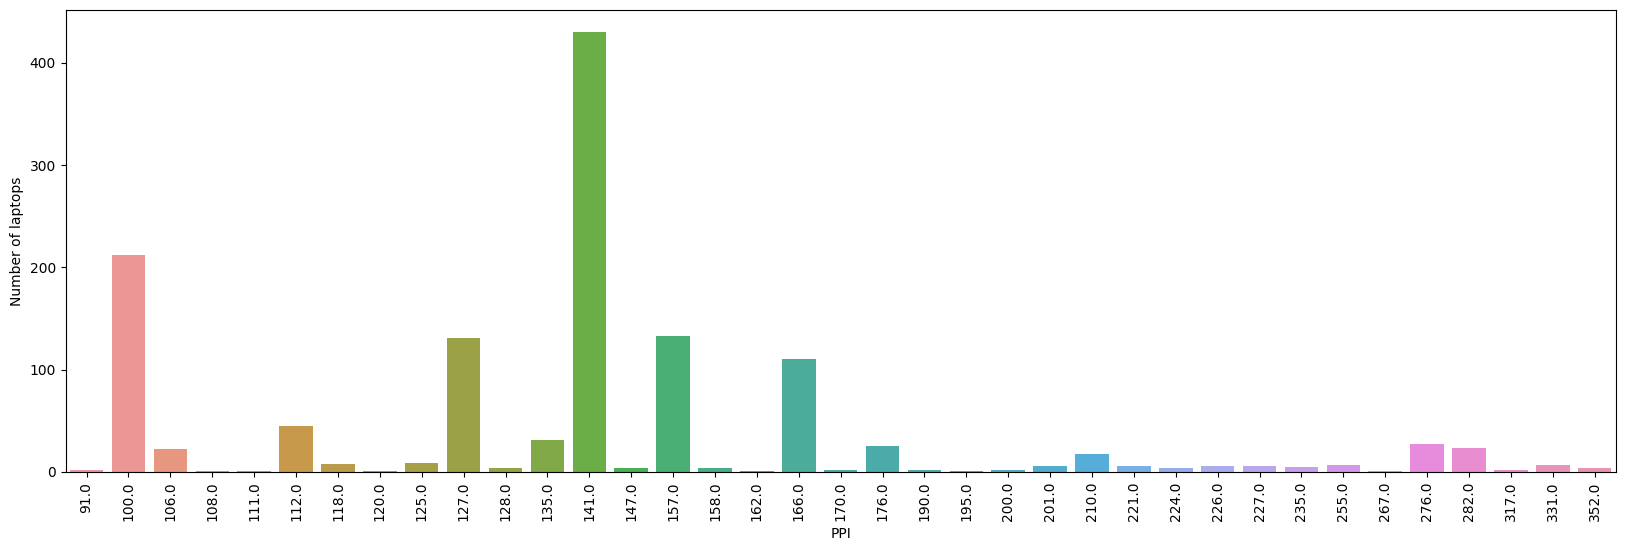

In [51]:
data1['PPI'] = round(data1['PPI'])                         # Rounding the PPI data upto no decimal points
fig, ax = plt.subplots(figsize=(20,6))                       # setting the figure size by providing length and breadth
graph = sns.countplot(x="PPI", data=data1, ax=ax)          # Plot graph to find count of each labels in PPI 
plt.xlabel('PPI')                                          # setting label of x axis
plt.ylabel('Number of laptops')                            # setting label of y axis
plt.xticks(rotation = 90)                                  # setting x lables at 90 degrees
plt.show()                                                 # shows the plot

The number of laptops is the most in case of '141 PPI'

## Bivariate Distribution

* **GPU Brand vs Price_Euros** 

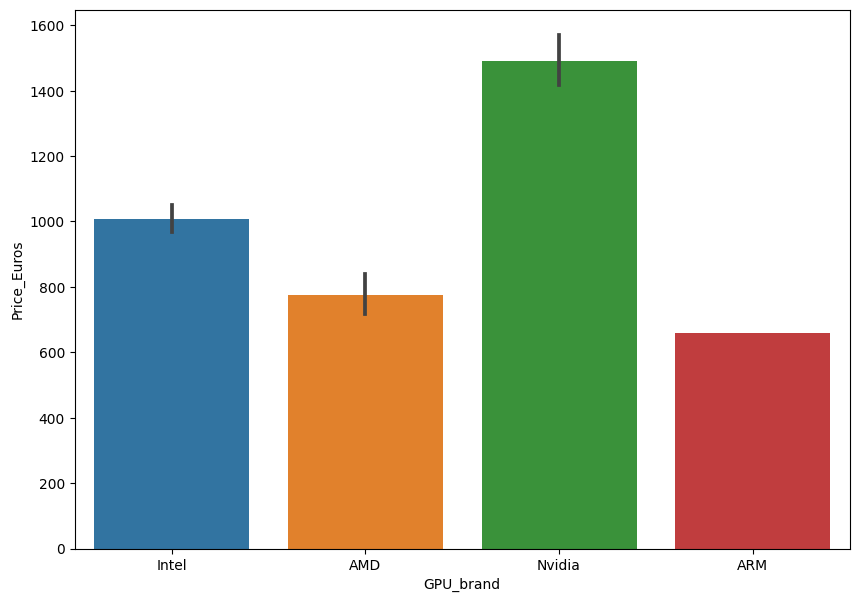

In [52]:
plt.figure(figsize = (10,7))                                     # Setting figure size of the plot
sns.barplot(x=data1['GPU_brand'],y=data1['Price_Euros'])       # plotting the barplot with its heights for categorical data
plt.show()                                                     # plots the graph

* The 'GPU_brand' named 'Nvidia' is highly priced among the remaining brands.

* **Company vs Price_Euros**

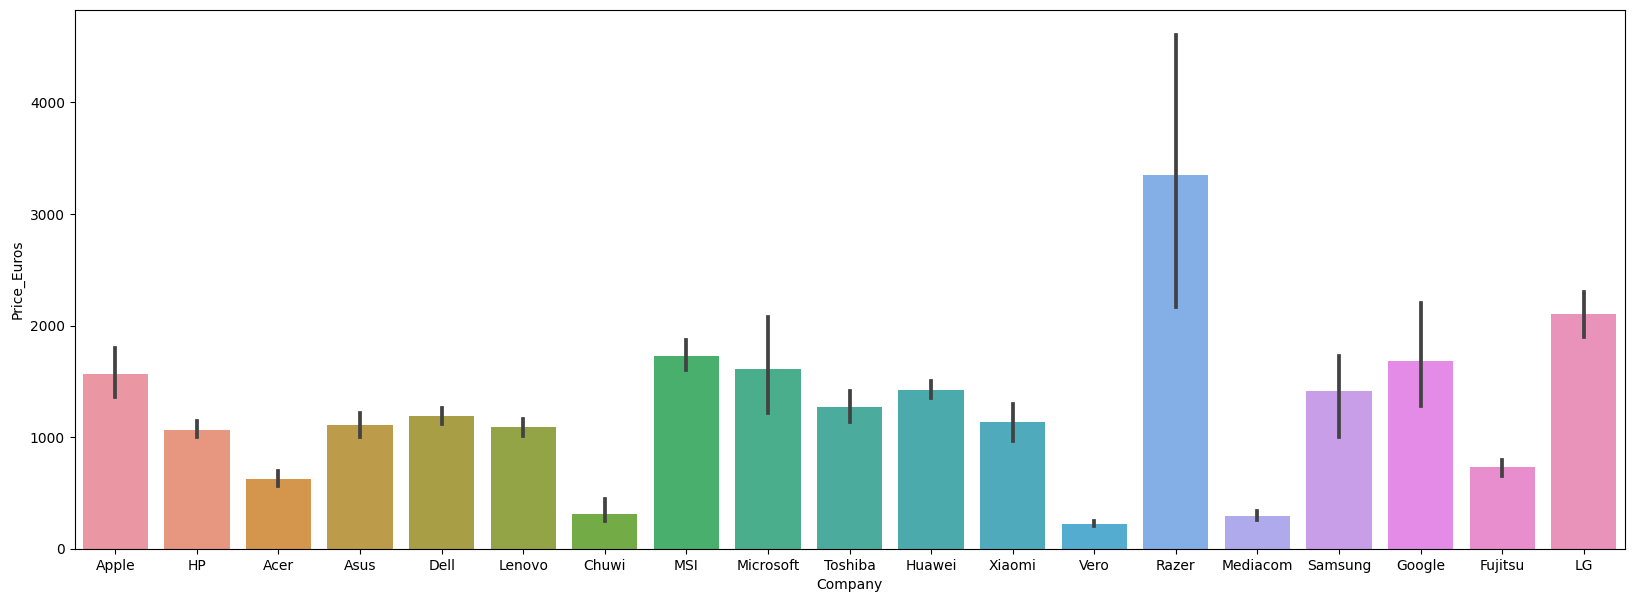

In [53]:
plt.figure(figsize = (20,7))                                    # Setting figure size of the plot
sns.barplot(x=data['Company'] , y=data['Price_Euros'])        # plotting the barplot with its heights for categorical data
plt.show()                                                    # plots the graph

* Company 'Razer' is the highest priced laptop.
* Company 'Vero' is the lowest priced laptop.

* **Inches vs Price_Euros**



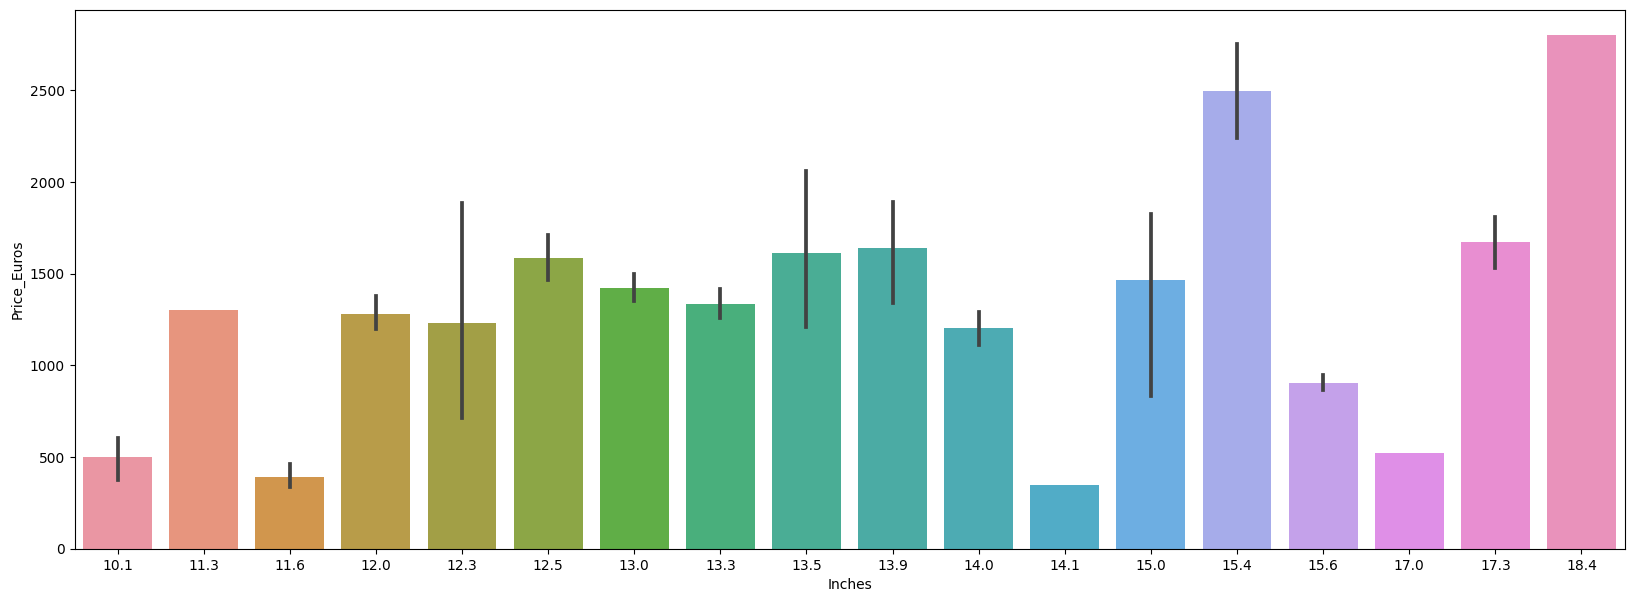

In [54]:
plt.figure(figsize = (20,7))                                   # Setting figure size of the plot
sns.barplot(x=data1['Inches'] , y=data['Price_Euros'])       # plotting the barplot with its heights for categorical data
plt.show()                                                   # plots the graph

* The highest Price is for '18.4 Inches' and lowest price is for '14.1' and '11.6' inches

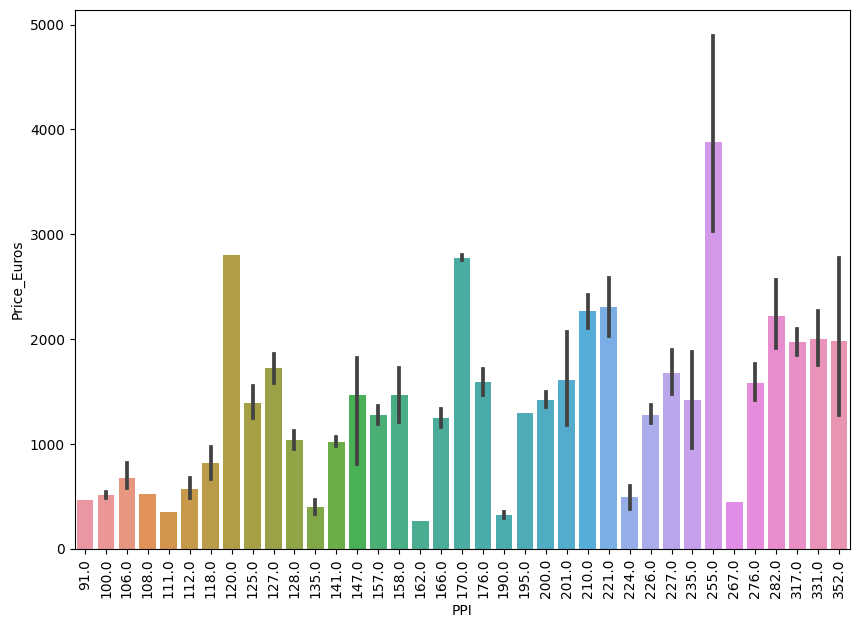

In [55]:
plt.figure(figsize = (10,7))                                      # Setting figure size of the plot
sns.barplot(x=data1['PPI'] , y=data['Price_Euros'])             # plotting the barplot with its heights for categorical data
plt.xticks(rotation = 'vertical')                               # making the names of x labels verticals i.e. 90 degrees
plt.show()                                                      # plots the graph

* The highest price is for 'PPI value of 255'
* The lowest price is for 'PPI value of 162'

* **Scatter Plots**

Text(0, 0.5, 'Price in Euros')

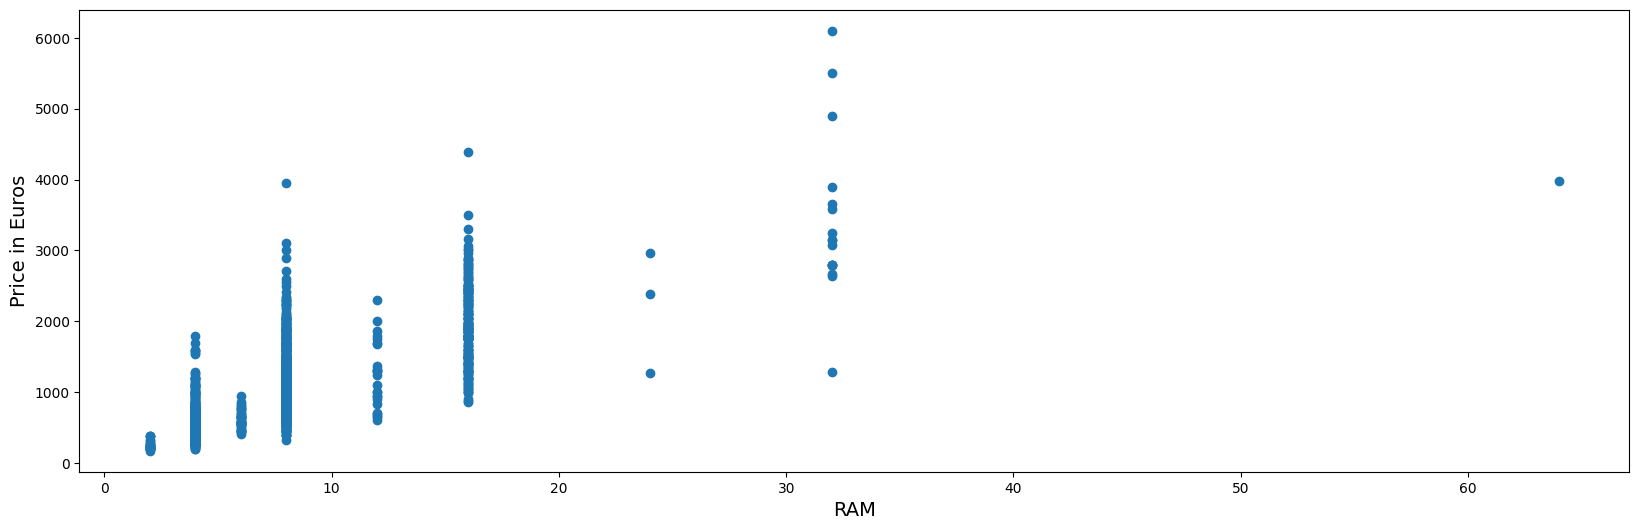

In [56]:
plt.figure(figsize=(20,6))                             # Setting figure size of the plot  
plt.scatter(x=data1['RAM'], y= data1['Price_Euros']) # Plotting scatter graph to check relationship between dependent and independent variables
plt.xlabel('RAM', fontsize=14)                       # naming the x axis
plt.ylabel('Price in Euros', fontsize=14)            # naming the y axis


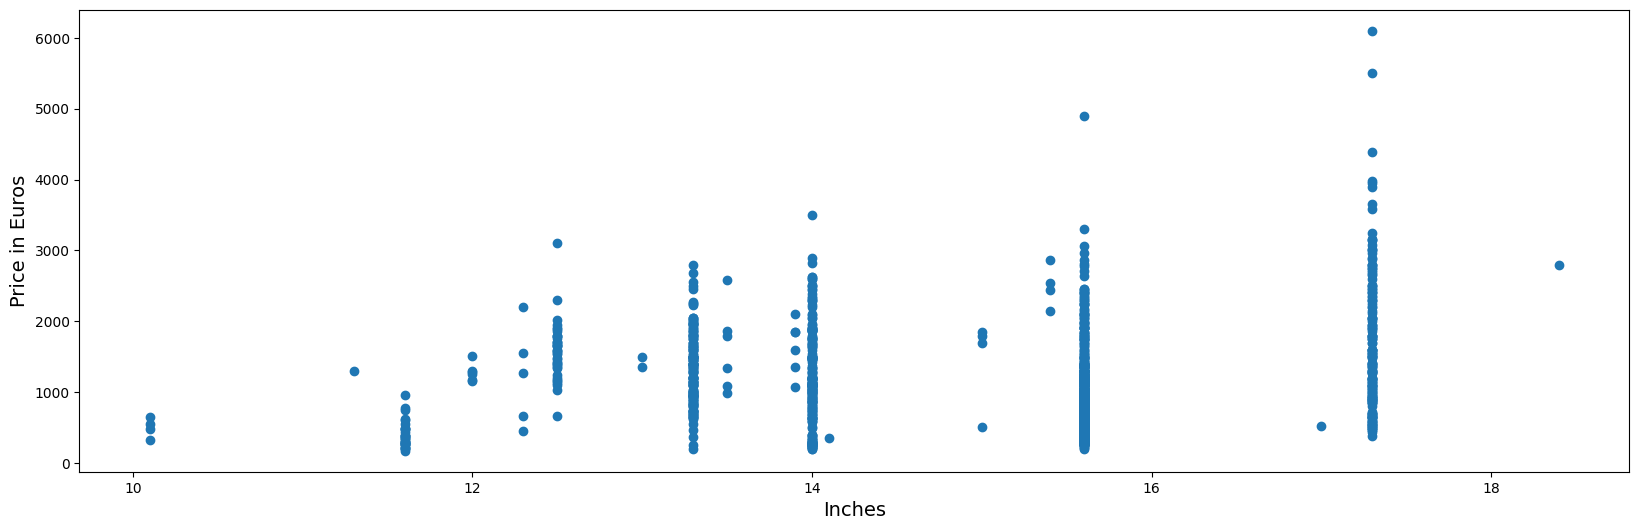

In [57]:
plt.figure(figsize=(20,6))                              # Setting figure size of the plot  
plt.ylabel("Price in Euros", fontsize=14)               # naming the y axis
plt.scatter(x=data1['Inches'], y= data1['Price_Euros']) # Plotting scatter graph to check relationship between dependent and independent variables
plt.xlabel("Inches", fontsize=14)                       # naming the x axis
plt.show()

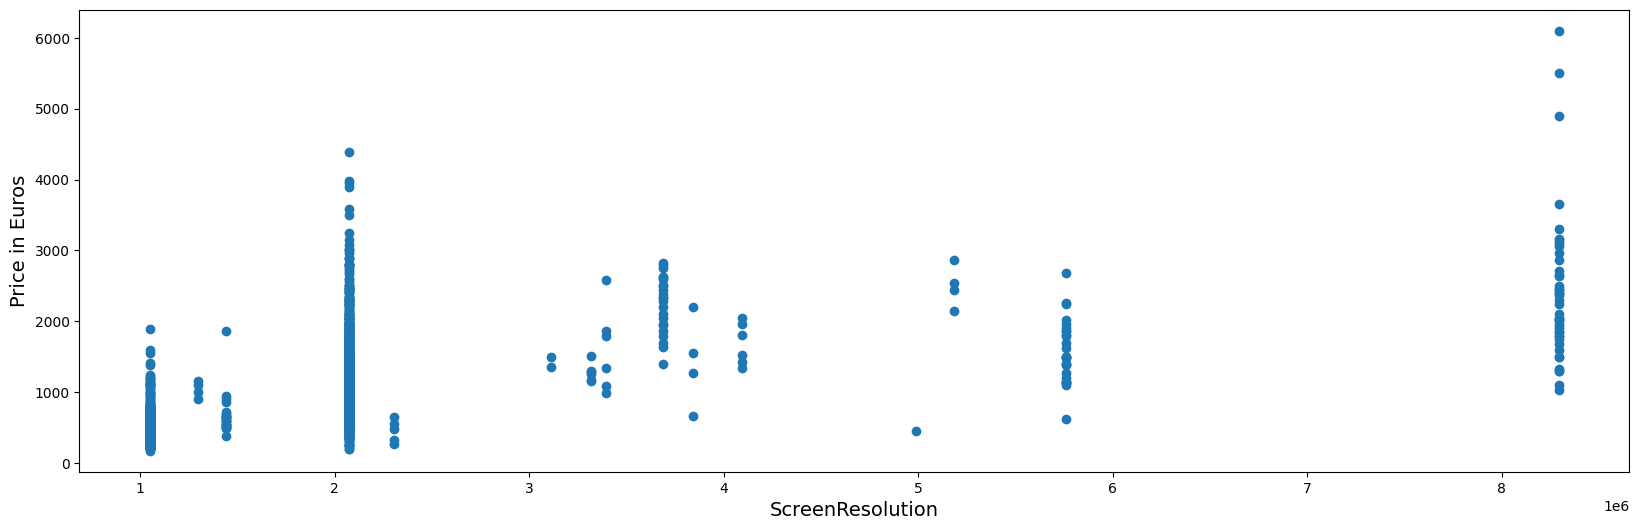

In [58]:
plt.figure(figsize=(20,6))                                 # Setting figure size of the plot 
plt.ylabel("Price in Euros", fontsize=14)                # naming the y axis
plt.scatter(x=data1['ScreenResolution'], y= data1['Price_Euros'])  # Plotting scatter graph to check relationship between dependent and independent variables
plt.xlabel("ScreenResolution", fontsize=14)               # naming the x axis
plt.show()

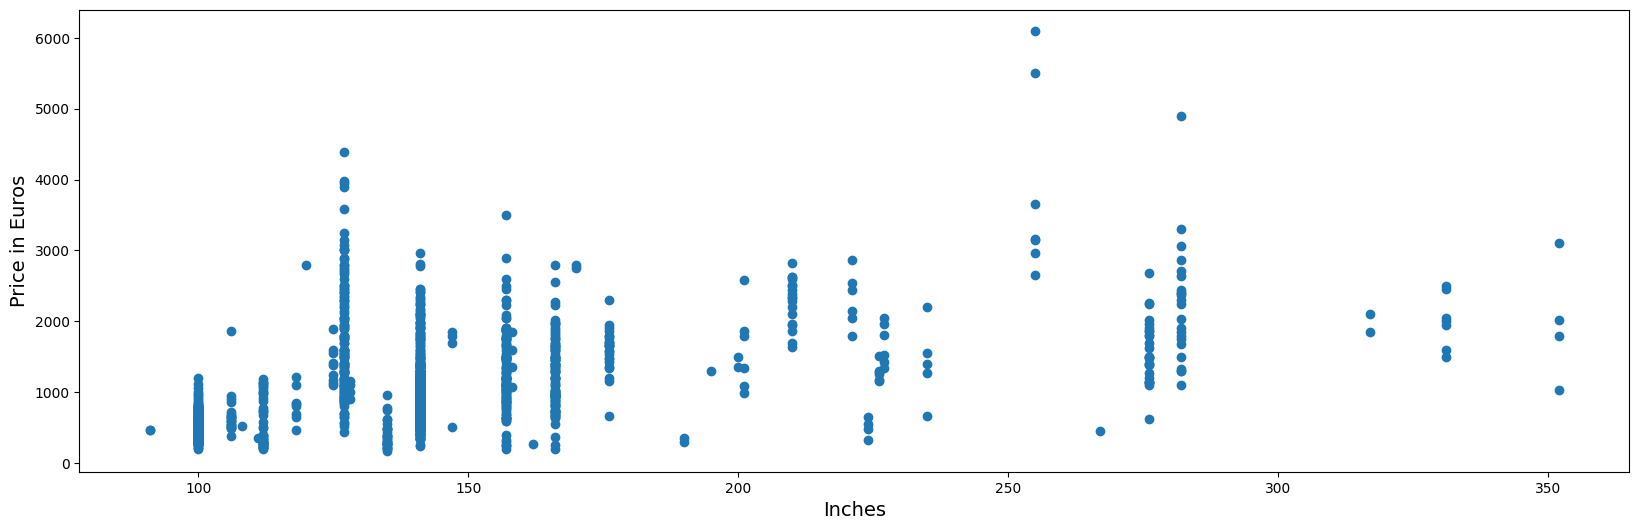

In [59]:
plt.figure(figsize=(20,6))                        # Setting figure size of the plot 
plt.ylabel("Price in Euros", fontsize=14)       # naming the y axis
plt.scatter(x=data1['PPI'], y= data1['Price_Euros']) # Plotting scatter graph to check relationship between dependent and independent variables
plt.xlabel("Inches", fontsize=14)                  # naming the x axis

plt.show()

* There exists no 'Homoscedascticity' or 'Heteroscedasticity' in the given dataset by visualizing the scatter plot.

### Multicolinearity Between Independent Variables

In [60]:
df = data1.copy()  # Copying data to df variable

In [61]:
# Compute VIF data for each independent variable

# Creating a dataframe taking only numerical variables
df2 = df[['Inches','RAM','Weight','PPI','ScreenResolution','HDD','SSD','Hybrid','Flash_Storage']]
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Importing statiscal model for VIF
vif = pd.DataFrame()                                                      # Creating an empty dataframe
vif["features"] = df2.columns                                             # Assigning the values to the 'feature' in the dataframe
vif["vif_Factor"] = [variance_inflation_factor(df2.values, i) for i in range(df2.shape[1])] # Putting the vif values in dataframe
vif          

,features,vif_Factor
0,Inches,90.202307
1,RAM,9.598518
2,Weight,38.844647
3,PPI,80.393342
4,ScreenResolution,22.991725
5,HDD,3.276479
6,SSD,5.807097
7,Hybrid,1.075218
8,Flash_Storage,1.167288


* The VIF table shows that most of the variable have VIF value more than 10 which means they are highly correlated.

* So the features with VIF values less than 10 is :

'Inches', 'RAM', 'Weight' , 'HDD', 'SSD' ,'Hybrid', 'Flash_Storage'.

#### Selecting independent variables for VIF

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor          # Importing statiscal model for VIF

# Creating a dataframe taking only numerical variables
df1 = df[[ 'RAM' , 'HDD', 'SSD' ,'Hybrid', 'Flash_Storage']]
vif1 = pd.DataFrame()                                                             # Creating an empty dataframe
vif1["features"] = [ 'RAM' , 'HDD', 'SSD' ,'Hybrid', 'Flash_Storage']             # Assigning the values to the 'feature' in the dataframe
vif1["vif_Factor"] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]  # Putting the vif values in dataframe
vif1

,features,vif_Factor
0,RAM,7.013939
1,HDD,2.261765
2,SSD,4.794277
3,Hybrid,1.049424
4,Flash_Storage,1.063874


### To find correlation between different values using Heatmap

In [63]:
df = pd.get_dummies(data = df,columns = ["GPU_brand","CPU Brand",'Company'])  # One hot encoding on the mentioned columns of dataframe

/var/folders/04/t60y74qx7210dspdklnp7gn80000gn/T/ipykernel_4897/4135357381.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data1.corr(),annot = True)          # Correlation represented using heatmap with annotation


<AxesSubplot: >

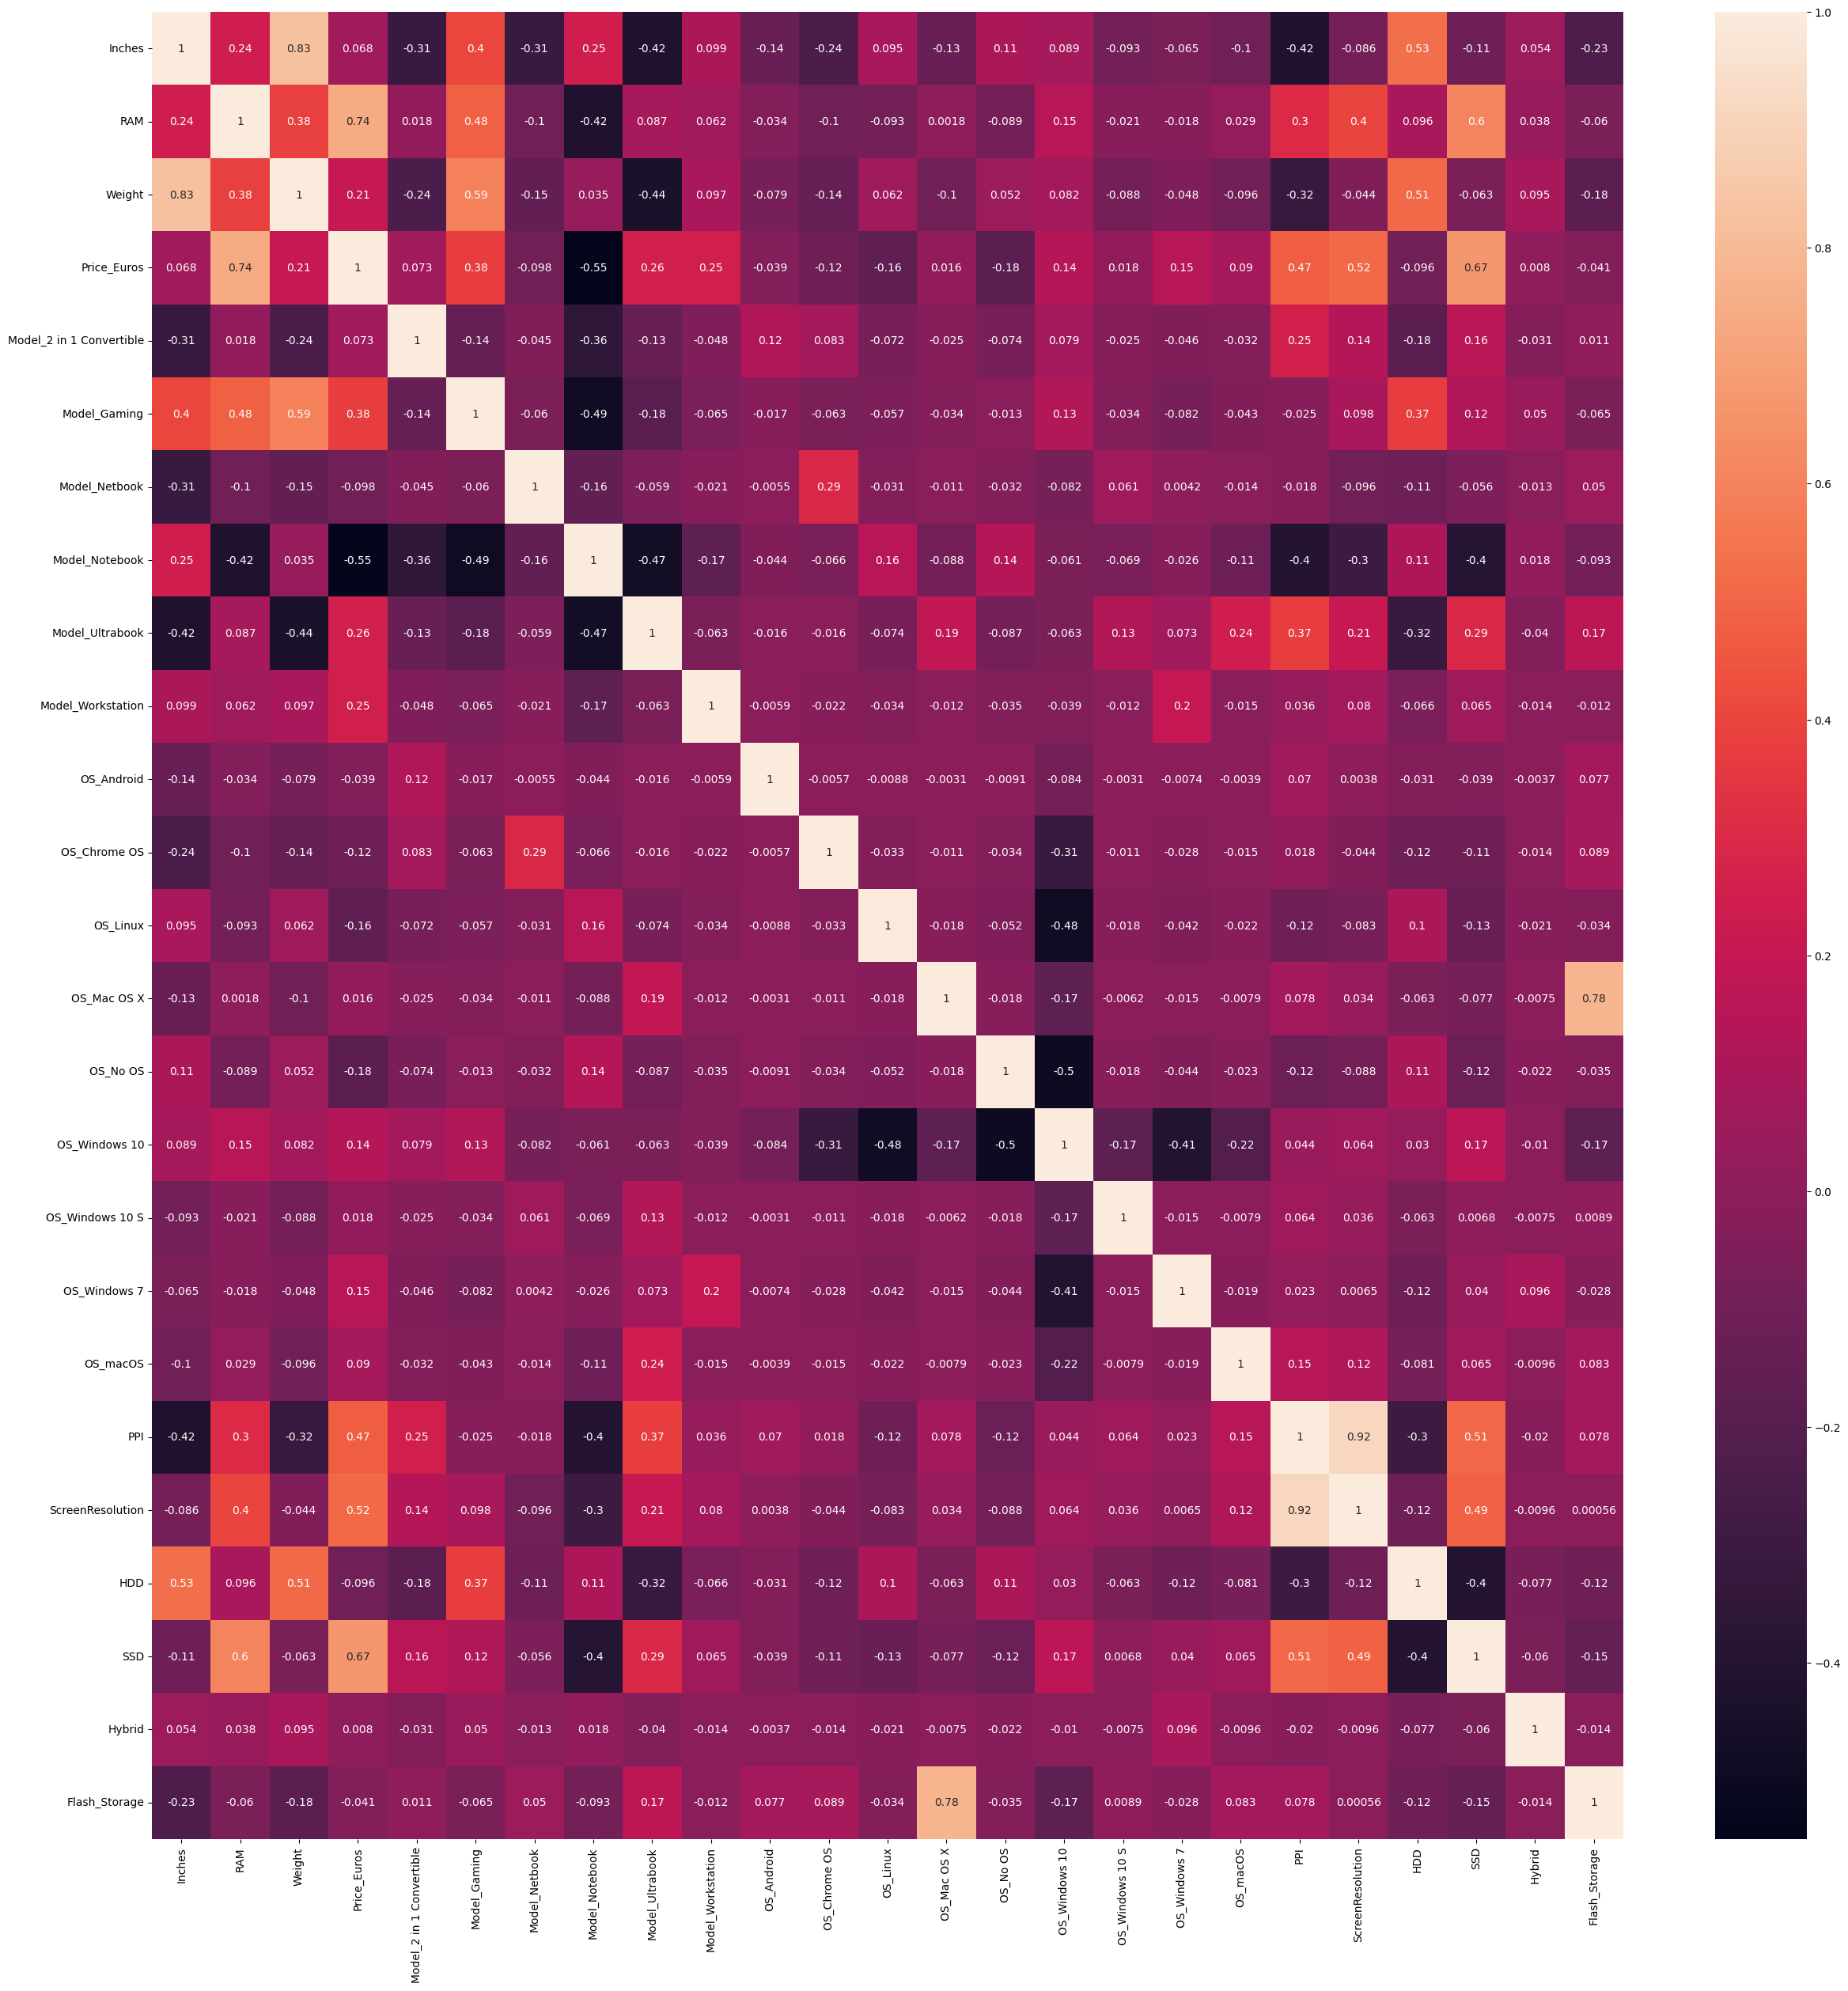

In [64]:
plt.subplots(figsize=(30,30))                    # The size of the figure is set by giving length and breadth
sns.heatmap(data1.corr(),annot = True)          # Correlation represented using heatmap with annotation


In [65]:
df.corr()    #  correlation table between different variables

,Inches,RAM,Weight,Price_Euros,Model_2 in 1 Convertible,Model_Gaming,Model_Netbook,Model_Notebook,Model_Ultrabook,Model_Workstation,...,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi
Inches,1.000000,0.237993,0.827631,0.068197,-0.314691,0.402666,-0.314030,0.246907,-0.417950,0.098893,...,0.001667,-0.055055,0.207877,-0.080415,-0.072377,-0.025923,-0.069898,-0.090946,-0.046401,-0.022075
RAM,0.237993,1.000000,0.383874,0.743007,0.017560,0.481728,-0.102976,-0.416486,0.087470,0.062353,...,0.021591,-0.036538,0.190425,-0.067495,-0.005114,0.159724,0.037484,0.010946,-0.053302,0.017663
Weight,0.827631,0.383874,1.000000,0.210370,-0.236693,0.591756,-0.154059,0.034893,-0.439952,0.097031,...,-0.071401,-0.029767,0.194364,-0.077511,-0.080508,0.017343,-0.090664,-0.117163,-0.059121,-0.034930
Price_Euros,0.068197,0.743007,0.210370,1.000000,0.072675,0.375789,-0.097572,-0.549248,0.255658,0.249752,...,0.067053,-0.029007,0.180100,-0.087161,0.047562,0.233756,0.034584,0.040339,-0.071972,0.000776
Model_2 in 1 Convertible,-0.314691,0.017560,-0.236693,0.072675,1.000000,-0.138248,-0.044750,-0.359451,-0.134629,-0.048272,...,-0.015370,0.128711,-0.066527,0.012659,-0.021762,-0.023514,0.037170,-0.062572,-0.017755,-0.017755
Model_Gaming,0.402666,0.481728,0.591756,0.375789,-0.138248,1.000000,-0.060434,-0.485436,-0.181815,-0.065191,...,-0.020757,-0.073994,0.481216,-0.031756,-0.029389,0.112418,-0.036035,-0.084503,-0.023977,-0.023977
Model_Netbook,-0.314030,-0.102976,-0.154059,-0.097572,-0.044750,-0.060434,1.000000,-0.157131,-0.058852,-0.021102,...,-0.006719,-0.022650,-0.029082,-0.010279,-0.009513,-0.010279,0.055885,-0.027353,-0.007761,-0.007761
Model_Notebook,0.246907,-0.416486,0.034893,-0.549248,-0.359451,-0.485436,-0.157131,1.000000,-0.472727,-0.169500,...,-0.053969,0.045276,-0.233599,0.044277,-0.076412,-0.082566,-0.075035,0.075630,0.049393,-0.006474
Model_Ultrabook,-0.417950,0.087470,-0.439952,0.255658,-0.134629,-0.181815,-0.058852,-0.472727,1.000000,-0.063485,...,0.114165,-0.069985,-0.087492,-0.030924,0.161641,0.027814,0.094514,0.054476,-0.023350,0.054264
Model_Workstation,0.098893,0.062353,0.097031,0.249752,-0.048272,-0.065191,-0.021102,-0.169500,-0.063485,1.000000,...,-0.007248,-0.032370,-0.031371,-0.011088,-0.010262,-0.011088,-0.012583,-0.029506,-0.008372,-0.008372


* **Finding the 10% mean of the target variable to validate RMSE value**

In [66]:
df["Price_Euros"].mean() * 0.1      #Taking 10% of mean of target values.

112.36869915579433

#DATA MODELLING

In [67]:
from sklearn.model_selection import train_test_split   
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

### Single Variable Regression

In [68]:
# create X and y
X = df[['RAM']]
y = df["Price_Euros"]

# follow the usual sklearn pattern: import, instantiate, fit
# importing linear regression model from sklearn.linear_model
from sklearn.linear_model import LinearRegression

#Creating LinearRegression Object (Representing LinearRegression as lr)
lm = LinearRegression()

lm.fit(X, y)  ## y = (coef_)x + intercept_

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

267.4948888127699
[102.14414117]


### Plotting the Least Squares Line

In [69]:
X_new = pd.DataFrame({'RAM': [df.RAM.min(), df.RAM.max()]})
X_new.head()

,RAM
0,2.0
1,64.0


In [70]:
preds = lm.predict(X_new)
preds

array([ 471.78317116, 6804.7199238 ])

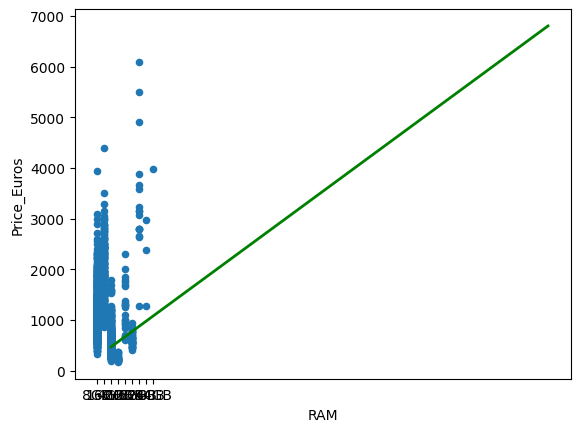

In [71]:
# first, plot the observed data
data.plot(kind='scatter', x='RAM', y='Price_Euros')

# then, plot the least squares line
plt.plot(X_new, preds, c='green', linewidth=2)

### LINEAR REGRSSION MODEL 1:

Taking all the features in the training variable.

In [72]:
X1 = df.drop("Price_Euros",axis = 1)
y1 = df["Price_Euros"]

In [73]:
train_X,test_X,train_y,test_y = train_test_split(X1,y1,test_size = 0.2,random_state = 30)

In [74]:
print(f"Train_x shape :{train_X.shape}",f"\nTrain_y shape :{train_y.shape}",f"\nTest_X shape :{test_X.shape}",f"\nTest_y shape :{test_y.shape}")

Train_x shape :(1042, 52) 
Train_y shape :(1042,) 
Test_X shape :(261, 52) 
Test_y shape :(261,)


In [75]:
lm1 = LinearRegression()
lm1.fit(train_X,train_y)

LinearRegression()

In [76]:
y_predicted = lm1.predict(test_X)

In [77]:
np.sqrt(mean_squared_error(test_y,y_predicted))

354.3053906074241

In [79]:
import statsmodels.api as sm

X2 = sm.add_constant(X1)

est = sm.OLS(y1, X2)

est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_Euros   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     101.8
Date:                Sun, 19 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:46:26   Log-Likelihood:                -9370.5
No. Observations:                1303   AIC:                         1.884e+04
Df Residuals:                    1256   BIC:                         1.908e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

* Our model explains 78.1% of the variance of the data as adjusted R^2 is .781.

* The p values greater than .10 are not significant are corresponding Beta coefficients won't give a best fit Model.

* RMSE is quite high than 10% of mean target value. 

### Linear Regression Model 2:

Selecting features based on lower significant p - values

In [80]:
X3 = df[["RAM",'Weight', 'Model_Notebook',"Model_Netbook","Model_Workstation","OS_No OS","OS_Windows 7","OS_macOS","ScreenResolution","SSD",'Flash_Storage','GPU_brand_Intel',"CPU Brand_Intel Core i5","CPU Brand_Intel Core i7",'Company_Acer','Company_Asus','Company_Chuwi','Company_Dell','Company_LG','Company_Razer']]
y3 = df["Price_Euros"]

In [81]:
train_X,test_X,train_y,test_y = train_test_split(X3,y3,test_size = 0.2,random_state = 30)

In [82]:
lm2 = LinearRegression()
lm2.fit(train_X,train_y)

LinearRegression()

In [83]:
y_predicted = lm2.predict(test_X)

In [84]:
np.sqrt(mean_squared_error(test_y,y_predicted))

349.1383635361747

In [85]:
import statsmodels.api as sm

X4 = sm.add_constant(X3)

est = sm.OLS(y3, X4)

est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_Euros   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     225.7
Date:                Sun, 19 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:46:29   Log-Likelihood:                -9399.6
No. Observations:                1303   AIC:                         1.884e+04
Df Residuals:                    1282   BIC:                         1.895e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

* Our model explains 73.1% of the variance of the data as adjusted R^2 is .731.
* The p values greater than .10 are not significant are corresponding Beta coefficients won't give a best fit Model.

* RMSE is quite high than 10% of mean target value.

### LINEAR REGRESSION MODEL 2:

Selecting features according to vif values

In [86]:
X7 = df[['RAM' , 'HDD', 'SSD' ,'Hybrid', 'Flash_Storage']]
y7 = df["Price_Euros"]

In [87]:
train_X,test_X,train_y,test_y = train_test_split(X7,y7,test_size = 0.2,random_state = 30)

In [88]:
lm3 = LinearRegression()
lm3.fit(train_X,train_y)

LinearRegression()

In [89]:
y_predicted = lm3.predict(test_X)

In [90]:
np.sqrt(mean_squared_error(test_y,y_predicted))

408.1491102264057

In [91]:
import statsmodels.api as sm

X8 = sm.add_constant(X7)

est = sm.OLS(y7, X8)

est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_Euros   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     445.1
Date:                Sun, 19 Mar 2023   Prob (F-statistic):          2.45e-278
Time:                        22:46:31   Log-Likelihood:                -9731.6
No. Observations:                1303   AIC:                         1.948e+04
Df Residuals:                    1297   BIC:                         1.951e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           260.9092     25.177     10.363

* Our model explains 63.1% of the variance of the data as adjusted R^2 is .631.

* The p values greater than .10 are not significant are corresponding Beta coefficients won't give a best fit Model.


* RMSE is quite high than 10% of mean target value.

#### LINEAR REGRESSION MODEL 4:

Selecting features based on p -values. Neglecting features having high p values than .10

In [92]:
X9 = df[['RAM' , 'SSD' , 'Flash_Storage']]
y9 = df["Price_Euros"]

In [93]:
train_X,test_X,train_y,test_y = train_test_split(X9,y9,test_size = 0.2,random_state = 30)

In [94]:
lm4 = LinearRegression()
lm4.fit(train_X,train_y)

LinearRegression()

In [95]:
y_predicted = lm4.predict(test_X)

In [96]:
np.sqrt(mean_squared_error(test_y,y_predicted))

407.63615195546345

In [97]:
import statsmodels.api as sm

X10 = sm.add_constant(X9)

est = sm.OLS(y9, X10)

est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_Euros   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     742.7
Date:                Sun, 19 Mar 2023   Prob (F-statistic):          3.93e-281
Time:                        22:46:34   Log-Likelihood:                -9731.8
No. Observations:                1303   AIC:                         1.947e+04
Df Residuals:                    1299   BIC:                         1.949e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           262.8658     22.883     11.488

# Cross Validation

In [99]:
from sklearn.model_selection import cross_val_score

In [100]:
CV = cross_val_score(lm,X3,y3,cv = 10,scoring= "neg_mean_squared_error")
print(CV)

[ -67533.61872665 -113960.07249955  -70516.33523551  -98278.70061073
 -128506.16414887 -113789.31378574 -197798.00204642 -115867.24779721
 -164703.63104491  -87853.12904261]


In [101]:
cv = -(CV)

In [102]:
print(np.sqrt(cv.mean()))

340.41242852431225


* The Cross Validation is quite high than 10% of mean target value. 

### Logrithm Transformation
y= a+ b* log(x)

### LINEAR REGRESSION MODEL 5:

In [103]:
# Input dataset
X_log = df.drop(['Price_Euros'], axis = 1)

# Output or Predicted Value of data
y_log = np.log(df['Price_Euros'])

In [104]:
X_train_log, X_test_1og, Y_train_log, Y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state= 42)

In [105]:
y_pred_log= LinearRegression()
y_pred_log.fit(X_train_log,Y_train_log)

LinearRegression()

In [106]:
# print(" Intercept value of Model is " ,y_pred_log.intercept_)
# print("Co-efficient Value of Log Model is : ", y_pred_log.coef_)

In [107]:
l_model= y_pred_log.predict(X_test_1og)
# l_model

In [108]:
print('X_test_1og', X_test_1og.shape)
print('Y_test_log',Y_test_log.shape)

X_test_1og (261, 52)
Y_test_log (261,)


In [110]:
from sklearn import metrics

In [111]:
Y_test_log = np.exp(Y_test_log)
l_model = np.exp(l_model)

Regression Plot - 
https://www.geeksforgeeks.org/how-to-make-scatter-plot-with-regression-line-using-seaborn-in-python/

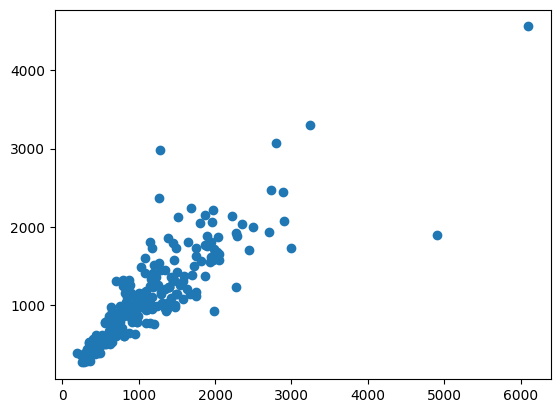

In [112]:
plt.scatter( x = Y_test_log, y = l_model )

* The actual versus predicted grapgh does not show a linear relationship

In [113]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_log, l_model))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_log, l_model) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_log, l_model)))
print("R^2 Score :          ", metrics.r2_score(Y_test_log, l_model))

Mean Absolute Error: 224.5443472296875
Mean Squared Error: 135617.91814458027
Root Mean Squared Error: 368.2633814874624
R^2 Score :           0.732996975878108


* After Taking logarithm of target variable, the RMSE value has not decreased much. 

In [114]:
df['RAM'] = np.log(df['RAM'])

In [115]:
# Input dataset
X_log = df[['RAM','SSD','Flash_Storage']]

# Output or Predicted Value of data
y_log = np.log(df['Price_Euros'])

In [116]:
X_train_log1, X_test_1og1, Y_train_log1, Y_test_log1 = train_test_split(X_log, y_log, test_size=0.2, random_state= 42)

In [117]:
y_pred_log1= LinearRegression()
y_pred_log1.fit(X_train_log1,Y_train_log1)

LinearRegression()

In [118]:
l_model1 = y_pred_log1.predict(X_test_1og1)
# l_model

In [120]:
Y_test_log1 = np.exp(Y_test_log1)
l_model1 = np.exp(l_model1)

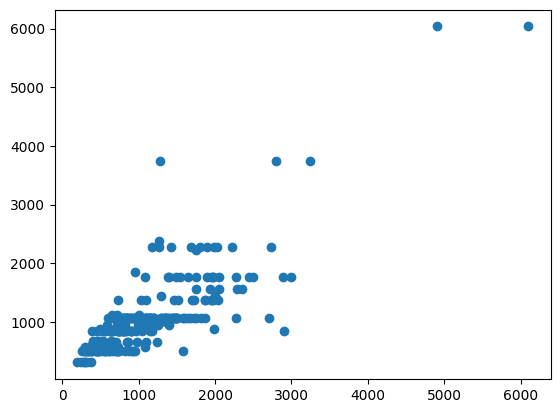

In [121]:
plt.scatter( x = Y_test_log1, y = l_model1 )

* The actual versus predicted grapgh does not show a linear relationship

In [122]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_log1, l_model1))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_log1, l_model1) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_log1, l_model1)))
print("R^2 Score :          ", metrics.r2_score(Y_test_log1, l_model1))

Mean Absolute Error: 298.70240745393454
Mean Squared Error: 187070.10057491608
Root Mean Squared Error: 432.5160119289413
R^2 Score :           0.6316985007612346


* After Taking logarithm of target variable and training variable, the RMSE value has increased and R^2 has decreased. 

### CONCLUSION:

* In EDA,while plotting the scatter plot of Target variable with other indenpendent variable no homoscedasticity or heteroscedasticity  was not observed, which implies the data is not linear.
* After cross validation we find that the mean of 10 RMSE values is 369 which is to large compare to the 10% mean of our target varibale i.e.112.36. 
* So, Linear regression model is not the right fit for this kind of data.
